# Proyecto Final Estadistica Multivareada Q3 2025
## PCA sobre WeatherAUS
### Estudiantes: Melany Ramirez, Jason Barrantes, Jasser Palacios, Junior Ramirez
En este notebook se realiza un análisis exploratorio y un **Análisis de Componentes Principales (PCA)** sobre variables meteorológicas seleccionadas del conjunto de datos *WeatherAUS*. El objetivo es identificar estructuras latentes (dimensiones) que sinteticen la variabilidad del clima (temperatura, presión, humedad, viento y precipitación).

## 1) Carga de datos y revisión inicial

En esta sección se carga el dataset y se revisa su estructura general (número de observaciones, variables disponibles y tipos de datos). Esta revisión permite identificar variables numéricas candidatas para PCA y anticipar posibles problemas como valores faltantes.


In [1]:
import pandas as pd

df = pd.read_csv("weatherAUS.csv")
df.info()
df.isnull().mean().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Sunshine         0.480098
Evaporation      0.431665
Cloud3pm         0.408071
Cloud9am         0.384216
Pressure9am      0.103568
Pressure3pm      0.103314
WindDir9am       0.072639
WindGustDir      0.070989
WindGustSpeed    0.070555
Humidity3pm      0.030984
WindDir3pm       0.029066
Temp3pm          0.024811
RainTomorrow     0.022460
Rainfall         0.022419
RainToday        0.022419
WindSpeed3pm     0.021050
Humidity9am      0.018246
WindSpeed9am     0.012148
Temp9am          0.012148
MinTemp          0.010209
MaxTemp          0.008669
Date             0.000000
Location         0.000000
dtype: float64

## 2) Selección de variables para PCA

Se seleccionan variables numéricas con sentido meteorológico y cobertura suficiente (porcentaje de valores faltantes manejable). El objetivo es construir una matriz de datos adecuada para PCA, evitando variables con demasiados NA que puedan distorsionar el análisis o exigir imputaciones poco confiables.


In [2]:
vars_pca = [
    "MinTemp","MaxTemp","Rainfall","WindGustSpeed",
    "Humidity9am","Humidity3pm","Pressure9am",
    "Pressure3pm","Temp9am","Temp3pm"
]

df_pca = df[vars_pca]
df_pca.head()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,44.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,46.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,24.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,41.0,82.0,33.0,1010.8,1006.0,17.8,29.7


## 3. Evaluación de valores faltantes

Se cuantifican los valores faltantes para definir una estrategia de imputación adecuada.


In [3]:
df_pca.isnull().sum()


MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustSpeed    10263
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
dtype: int64

## 4. Imputación de valores faltantes

Se utiliza imputación por la media para conservar el tamaño muestral y la estructura global de los datos.


In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_pca_imputed = pd.DataFrame(imputer.fit_transform(df_pca), columns=df_pca.columns)


## 5. Verificación posterior a la imputación

Se confirma que no existan valores faltantes antes de continuar con el análisis.


In [2]:
df_pca_imputed.isnull().sum()

NameError: name 'df_pca_imputed' is not defined

## 6. Estadísticos descriptivos

Se analizan medidas resumen para verificar rangos y consistencia meteorológica.


In [10]:
df_pca_imputed.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,40.035230,68.880831,51.539116,1017.649940,1015.255889,16.990631,21.683390
std,6.365750,7.088124,8.382488,13.118253,18.854765,20.471189,6.728467,6.663973,6.449221,6.850057
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,31.000000,57.000000,37.000000,1013.500000,1011.100000,12.300000,16.700000
50%,12.100000,22.700000,0.000000,39.000000,69.000000,51.539116,1017.649940,1015.255889,16.800000,21.400000
75%,16.800000,28.200000,1.000000,46.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.200000
max,33.900000,48.100000,371.000000,135.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


## 7. Análisis de distribuciones (Histogramas)

Se visualizan las distribuciones univariadas para detectar asimetrías y comportamientos típicos del clima.


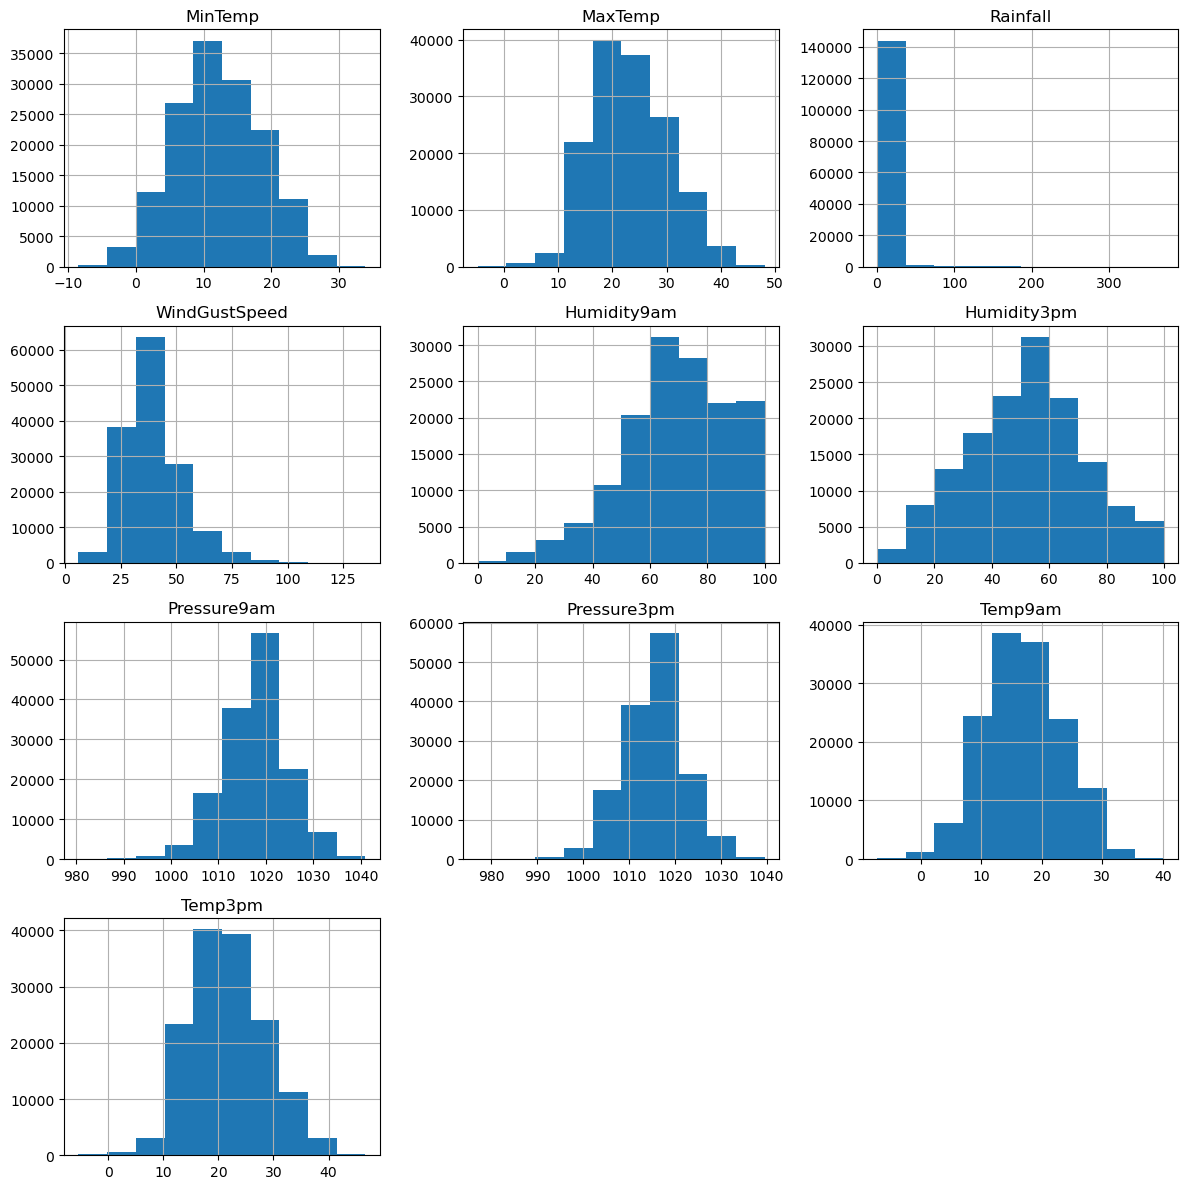

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
df_pca_imputed.hist(figsize=(12, 12))
plt.tight_layout()
plt.show()

## 8. Matriz de correlación (Heatmap)

Se analiza la correlación entre variables para justificar el uso de PCA.


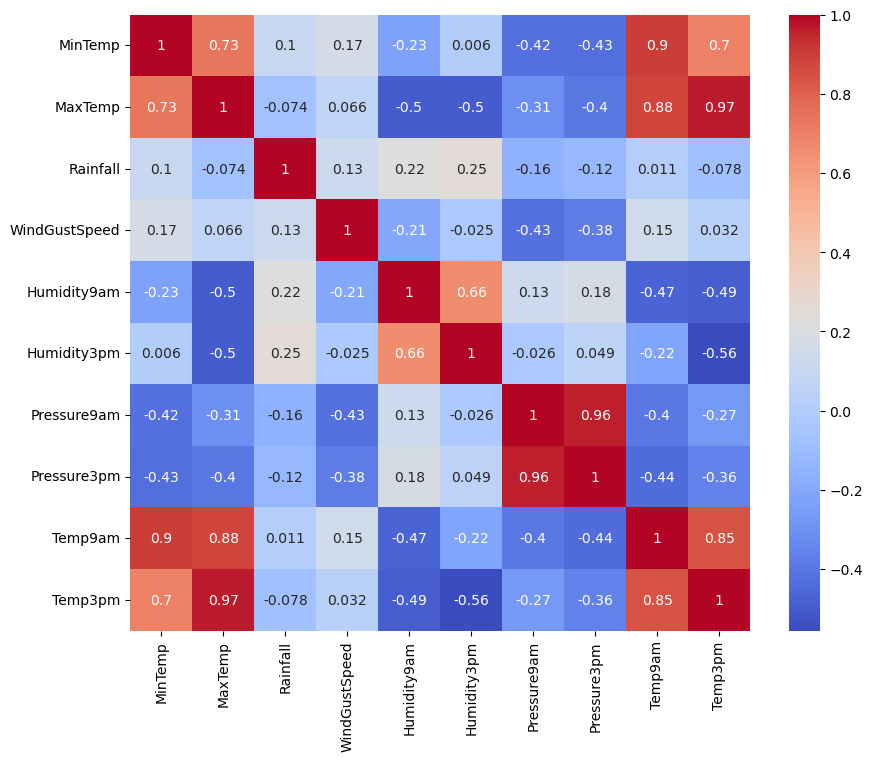

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df_pca_imputed.corr(), annot=True, cmap='coolwarm')
plt.show()


## 9. Escalamiento de variables

Las variables se estandarizan para asegurar que todas contribuyan equitativamente al PCA.


## 10. Ajuste del PCA

Se ajusta el modelo PCA sobre los datos estandarizados.


## 11. Varianza explicada por componente

Se analiza la proporción de varianza explicada por cada componente.


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Escalamiento
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca_imputed)

# PCA
pca = PCA()
pca_fit = pca.fit(df_scaled)

explained = pca.explained_variance_ratio_
explained


## 12. Scree Plot

Se visualiza la varianza explicada acumulada para seleccionar el número de componentes.


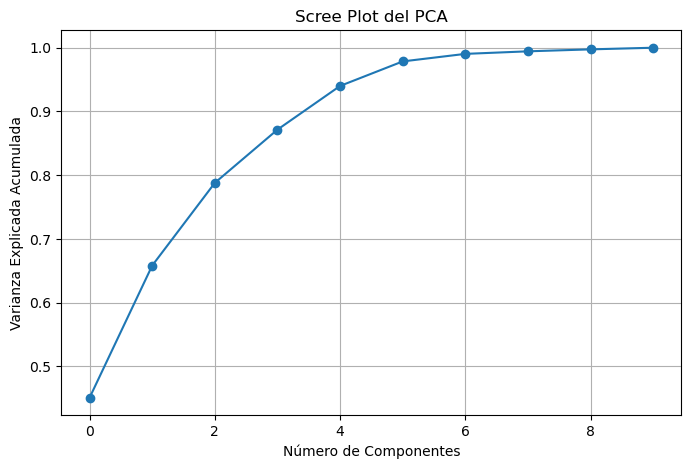

In [24]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Scree Plot del PCA")
plt.grid(True)
plt.show()


## 13. Cargas factoriales (Loadings)

Las cargas muestran la contribución de cada variable a los componentes principales.


In [25]:
import pandas as pd

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(df_pca_imputed.columns))],
    index=df_pca_imputed.columns
)
loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
MinTemp,0.379295,-0.124061,-0.385225,-0.039388,0.301773,-0.108135,0.670185,-0.367268,0.010675,-0.062344
MaxTemp,0.434097,0.165456,-0.165238,0.014632,-0.053014,0.242868,-0.389102,-0.153286,0.459974,-0.555336
Rainfall,-0.011313,-0.356623,-0.257704,0.817465,-0.358606,-0.094300,-0.017959,-0.006180,-0.003930,-0.012851
WindGustSpeed,0.131680,-0.315178,0.470719,0.335101,0.644037,0.359123,-0.072318,0.002615,-0.020659,0.006208
Humidity9am,-0.276920,-0.302589,-0.399296,-0.211967,-0.088764,0.739534,0.133502,0.219424,-0.054353,-0.060620
Humidity3pm,-0.210831,-0.438286,-0.397688,-0.212429,0.352239,-0.319910,-0.517132,-0.209334,0.077751,0.128329
Pressure9am,-0.270867,0.476111,-0.250556,0.240463,0.269224,0.083836,-0.138555,-0.225684,-0.582334,-0.300990
Pressure3pm,-0.298718,0.423631,-0.244722,0.261698,0.328428,0.020394,0.121054,0.229987,0.586789,0.287716
Temp9am,0.431839,0.014871,-0.265644,-0.004237,0.197899,-0.186851,-0.093413,0.767076,-0.263687,-0.044374
Temp3pm,0.424272,0.201733,-0.159636,0.036211,-0.106203,0.315990,-0.257047,-0.239526,-0.160947,0.701444


## 14. Biplot del PCA (PC1 vs PC2)

El biplot combina las observaciones y las variables en el espacio de los dos primeros componentes.


C:\Users\Sofi R\AppData\Local\Temp\ipykernel_22052\1563067814.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(0, 0, loadings['PC1'][i]*5, loadings['PC2'][i]*5, color='red', alpha=0.8)
C:\Users\Sofi R\AppData\Local\Temp\ipykernel_22052\1563067814.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loadings['PC1'][i]*5*1.15, loadings['PC2'][i]*5*1.15, var, color='red')


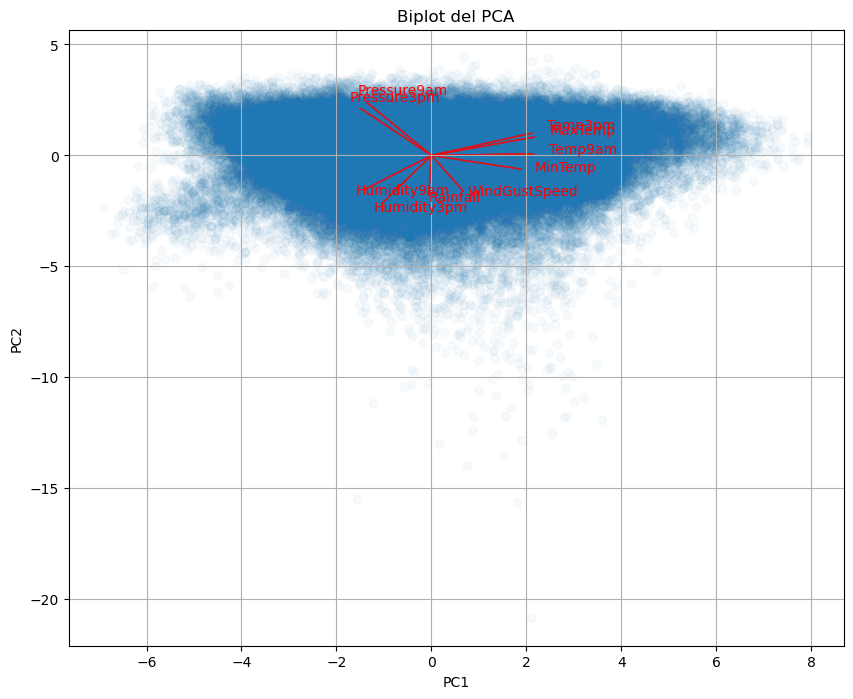

In [26]:
scores = pca.transform(df_scaled)

plt.figure(figsize=(10,8))
plt.scatter(scores[:,0], scores[:,1], alpha=0.03)

for i, var in enumerate(df_pca_imputed.columns):
    plt.arrow(0, 0, loadings['PC1'][i]*5, loadings['PC2'][i]*5, color='red', alpha=0.8)
    plt.text(loadings['PC1'][i]*5*1.15, loadings['PC2'][i]*5*1.15, var, color='red')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot del PCA")
plt.grid(True)
plt.show()



## 15. Loading Plot (PC1–PC4)

Se visualiza el peso de cada variable en los primeros cuatro componentes.


<Figure size 1400x600 with 0 Axes>

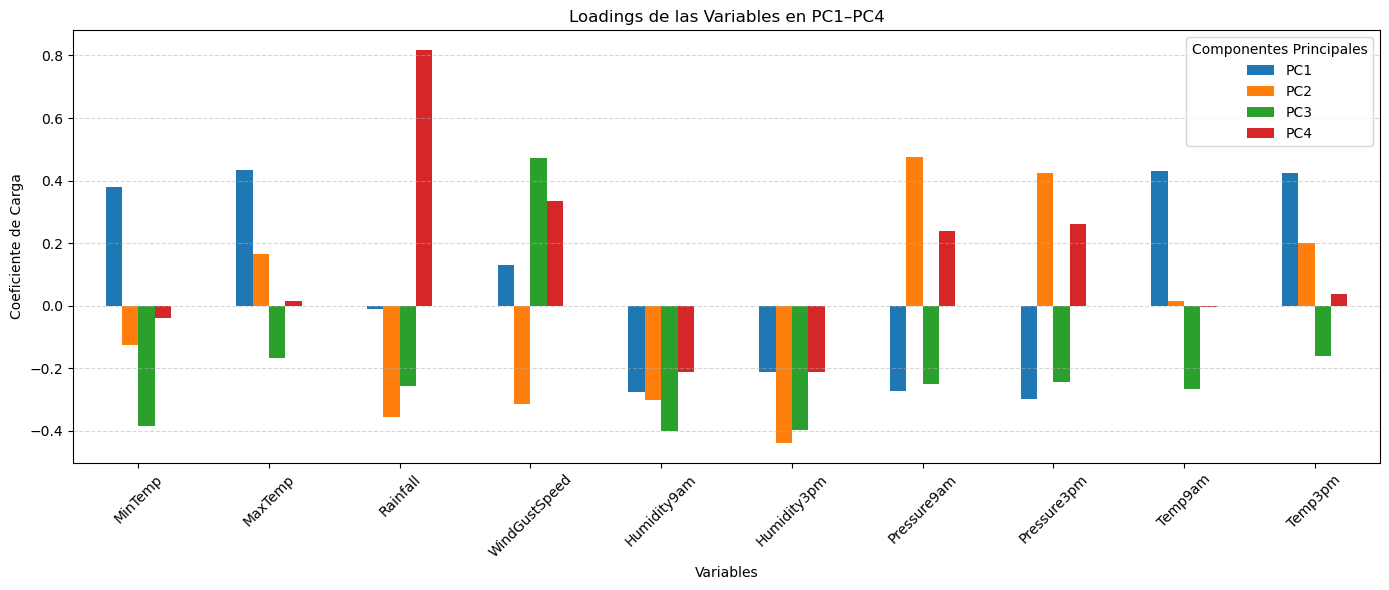

In [29]:
plt.figure(figsize=(14,6))

loadings.iloc[:, :4].plot(
    kind='bar',
    figsize=(14,6),
    color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Colores para PC1-PC4
)

plt.title("Loadings de las Variables en PC1–PC4")
plt.ylabel("Coeficiente de Carga")
plt.xlabel("Variables")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Componentes Principales")
plt.tight_layout()
plt.show()


# Conclusión General del Proyecto

El análisis realizado permitió comprender la estructura multivariada del comportamiento climático a partir del conjunto de datos **WeatherAUS**. El estudio exploratorio inicial evidenció distribuciones coherentes con fenómenos meteorológicos reales y reveló patrones relevantes en temperatura, humedad, presión y precipitación. La matriz de correlación mostró agrupamientos claros entre variables, particularmente entre las temperaturas, las presiones y las humedades, lo que justificó plenamente la aplicación del **Análisis de Componentes Principales (PCA)**.

El PCA permitió reducir la dimensionalidad del sistema climático a **cuatro componentes** que explican más del **85% de la variabilidad total**. El primer componente sintetiza el comportamiento térmico del día, integrando las distintas mediciones de temperatura. El segundo componente diferencia condiciones de alta presión asociadas a estabilidad atmosférica de días húmedos y lluviosos. El tercer componente refleja un contraste entre viento fuerte y niveles de humedad, mientras que el cuarto componente captura de manera casi exclusiva la variabilidad de la precipitación.

Los gráficos generados —*scree plot*, *biplot* y *loading plot*— confirmaron visualmente la estructura del PCA y facilitaron la interpretación de cada componente. En conjunto, estos resultados muestran que el clima australiano puede describirse de forma eficiente mediante unos pocos ejes latentes que representan dimensiones térmicas, atmosféricas, de humedad y de precipitación.

En conclusión, el PCA demostró ser una herramienta adecuada para sintetizar la información meteorológica, identificar patrones subyacentes y reducir la complejidad del conjunto de datos sin perder información esencial. Este análisis proporciona una base sólida para estudios posteriores orientados a predicción climática, clasificación de días según condiciones atmosféricas o análisis estacional del clima.
